In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Create the training data

In [2]:
N=2000
data=torch.randint(low=-10,high=11,size=(N,2)).float()

labels=torch.sum(data,axis=1,keepdim=True)

for i in range(N):
    print(data[i],labels[i])

tensor([2., 9.]) tensor([11.])
tensor([-9.,  3.]) tensor([-6.])
tensor([-5., 10.]) tensor([5.])
tensor([ 9., -4.]) tensor([5.])
tensor([6., 2.]) tensor([8.])
tensor([  0., -10.]) tensor([-10.])
tensor([-9.,  7.]) tensor([-2.])
tensor([-6.,  6.]) tensor([0.])
tensor([ 9., -4.]) tensor([5.])
tensor([-5.,  7.]) tensor([2.])
tensor([ 6., -9.]) tensor([-3.])
tensor([-5.,  4.]) tensor([-1.])
tensor([ 1., -5.]) tensor([-4.])
tensor([9., 7.]) tensor([16.])
tensor([ 6., -2.]) tensor([4.])
tensor([ -1., -10.]) tensor([-11.])
tensor([ 8., -5.]) tensor([3.])
tensor([-6., -7.]) tensor([-13.])
tensor([-5.,  2.]) tensor([-3.])
tensor([-7.,  6.]) tensor([-1.])
tensor([-3.,  7.]) tensor([4.])
tensor([ 5., -5.]) tensor([0.])
tensor([-7., -8.]) tensor([-15.])
tensor([2., 2.]) tensor([4.])
tensor([4., 6.]) tensor([10.])
tensor([6., 2.]) tensor([8.])
tensor([-1.,  1.]) tensor([0.])
tensor([ 8., -7.]) tensor([1.])
tensor([ 0., -9.]) tensor([-9.])
tensor([-6.,  2.]) tensor([-4.])
tensor([3., 7.]) tensor([10.

In [3]:
labels.shape

torch.Size([2000, 1])

### Design the model

In [4]:
def createADDmodel():
    ADDclassify=nn.Sequential(
        nn.Linear(2,30),
        nn.ReLU(),
        nn.Linear(30,1),
        nn.ReLU(),
        nn.Linear(1,1),
    )

    lossfun=nn.MSELoss()
    optimizer=torch.optim.Adam(ADDclassify.parameters(),lr=.01)

    return ADDclassify,lossfun,optimizer

### Train the model

In [5]:
numepochs=10
def trainTheModel(ADDmodel):
    losses=torch.zeros(numepochs)
    for epochi in range(numepochs):
        numloss=[]
        for num,ans in zip(data,labels):
            yHat=ADDmodel(num)
            loss=lossfun(yHat,ans)
            numloss.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    losses[epochi]=np.mean(numloss)

    with torch.no_grad():
        predictions=ADDmodel(data)

    trainacc=100*torch.mean((np.abs(predictions-labels)<1).float())

    testdata=torch.randint(low=-10,high=11,size=(N,2)).float()
    testlabels=torch.sum(testdata,axis=1,keepdim=True)

    with torch.no_grad():
        predictions=ADDmodel(testdata)

    testacc=100*torch.mean((np.abs(predictions-testlabels)<1).float())

    return losses,trainacc,testacc,ADDmodel

In [6]:
AddingMachine,lossfun,optimizer=createADDmodel()
losses,trainacc,testacc,AdDmodel=trainTheModel(AddingMachine)

trainacc,testacc

C:\Users\roger\AppData\Local\Temp\ipykernel_13892\2018537379.py:20: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  trainacc=100*torch.mean((np.abs(predictions-labels)<1).float())
C:\Users\roger\AppData\Local\Temp\ipykernel_13892\2018537379.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testacc=100*torch.mean((np.abs(predictions-testlabels)<1).float())


(tensor(99.5500), tensor(99.8500))

### Run the experiment !

In [7]:
for i in range(10):
    AddingMachine,lossfun,optimizer=createADDmodel()
    _,trainacc,testacc,AdDmodel=trainTheModel(AddingMachine)

    print('Model instance %s, final Train/Test accuracies: %g%%, %g%%' %(i+1,trainacc,testacc))

C:\Users\roger\AppData\Local\Temp\ipykernel_13892\2018537379.py:20: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  trainacc=100*torch.mean((np.abs(predictions-labels)<1).float())
C:\Users\roger\AppData\Local\Temp\ipykernel_13892\2018537379.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testacc=100*torch.mean((np.abs(predictions-testlabels)<1).float())


Model instance 1, final Train/Test accuracies: 99.65%, 99.5%
Model instance 2, final Train/Test accuracies: 9.9%, 8.8%
Model instance 3, final Train/Test accuracies: 99.55%, 99.75%
Model instance 4, final Train/Test accuracies: 99.55%, 99.8%
Model instance 5, final Train/Test accuracies: 99.65%, 99.4%
Model instance 6, final Train/Test accuracies: 9.9%, 8.9%
Model instance 7, final Train/Test accuracies: 9.9%, 8.5%
Model instance 8, final Train/Test accuracies: 99.55%, 99.9%
Model instance 9, final Train/Test accuracies: 99.55%, 99.75%
Model instance 10, final Train/Test accuracies: 99.85%, 99.7%


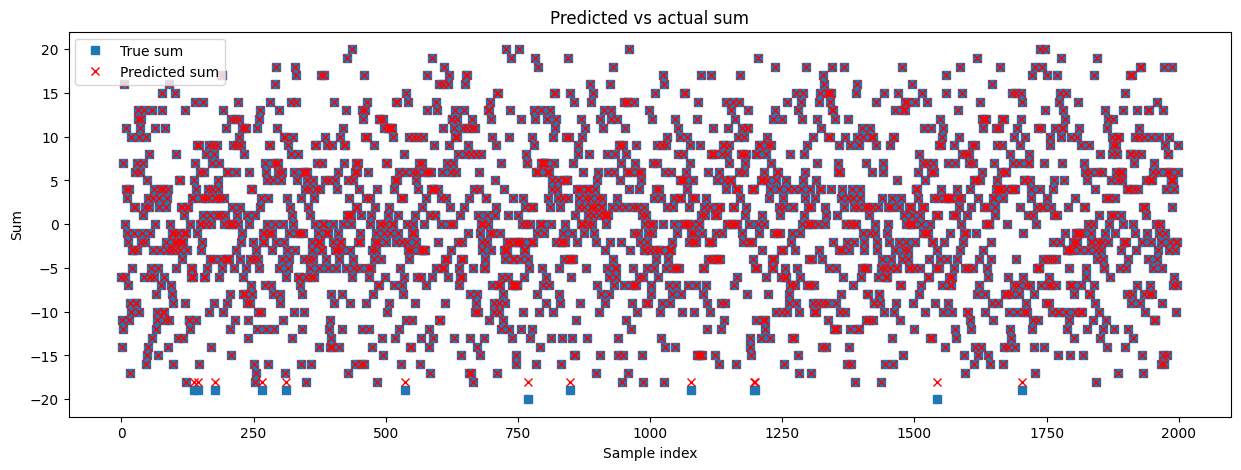

In [8]:
### Some plots from the final model
data=torch.randint(low=-10,high=11,size=(N,2)).float()
labels=torch.sum(data,axis=1,keepdim=True)

with torch.no_grad():
    predictions=AddingMachine(data)

fig=plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs actual sum')
plt.show()